In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 2.9MB 61.4MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [0]:
pip install jpype1==0.7.0

     |████████████████████████████████| 2.7MB 3.3MB/s 
  Found existing installation: JPype1 0.7.4
    Uninstalling JPype1-0.7.4:
      Successfully uninstalled JPype1-0.7.4


In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


!ls "/gdrive/My Drive/Colab Notebooks"

KeyboardInterrupt: ignored

In [0]:
def read_data(filename):
    with open(filename, 'r', encoding = 'cp949') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

In [0]:
train_data = read_data('/gdrive/My Drive/Colab Notebooks/ratings_train.txt')
test_data = read_data('/gdrive/My Drive/Colab Notebooks/ratings_test.txt')

In [0]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [0]:
from konlpy.tag import Okt

In [0]:
okt = Okt()
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]


In [0]:
import json
import os
from pprint import pprint

In [0]:
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [0]:
if os.path.isfile('train_docs.json'):
    with open('train_docs.json') as f:
        train_docs = json.load(f)
    with open('test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

In [0]:
with open('/gdrive/My Drive/Colab Notebooks/train_docs.json') as f:
        train_docs = json.load(f)

FileNotFoundError: ignored

In [0]:
with open('/gdrive/My Drive/Colab Notebooks/test_docs.json') as f:
        test_docs = json.load(f)

FileNotFoundError: ignored

In [0]:
pprint(train_docs[0])

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')


In [0]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159924


In [0]:
import nltk
text = nltk.Text(tokens, name='NMSC')

In [0]:
# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2159924
49895
[('./Punctuation', 67777),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [0]:
import matplotlib.pyplot as plt

In [0]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
fm._rebuild()

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/back

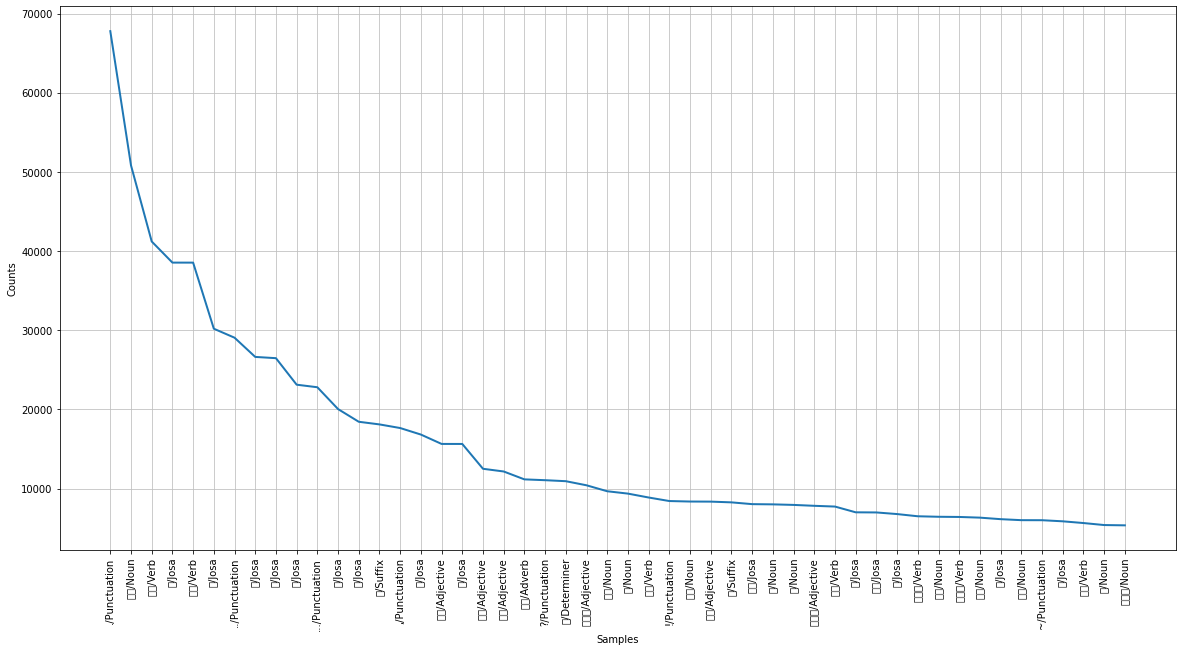

In [0]:

from matplotlib import font_manager, rc
%matplotlib inline


plt.figure(figsize=(20,10))
text.plot(50)

In [0]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [0]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
293/293 [==============================] - 2s 8ms/step - loss: 0.3845 - binary_accuracy: 0.8347
Epoch 2/10
293/293 [==============================] - 2s 8ms/step - loss: 0.3130 - binary_accuracy: 0.8665
Epoch 3/10
293/293 [==============================] - 2s 8ms/step - loss: 0.2870 - binary_accuracy: 0.8809
Epoch 4/10
293/293 [==============================] - 2s 8ms/step - loss: 0.2659 - binary_accuracy: 0.8925
Epoch 5/10
293/293 [==============================] - 2s 8ms/step - loss: 0.2460 - binary_accuracy: 0.9025
Epoch 6/10
293/293 [==============================] - 2s 8ms/step - loss: 0.2268 - binary_accuracy: 0.9110
Epoch 7/10
293/293 [==============================] - 2s 8ms/step - loss: 0.2075 - binary_accuracy: 0.9198
Epoch 8/10
293/293 [==============================] - 2s 8ms/step - loss: 0.1895 - binary_accuracy: 0.9275
Epoch 9/10
293/293 [==============================] - 2s 8ms/step - loss: 0.1731 - binary_accuracy: 0.9345
Epoch 10/10
1563/1563 [==============

In [0]:
results

[0.4126075506210327, 0.8534600138664246]

In [0]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    result = score * 100
    return result

In [0]:
predict_pos_neg('올해 최고의 영화!')

94.92377638816833

In [0]:
import pandas as pd
mydata = pd.read_excel('/gdrive/My Drive/Colab Notebooks/추가영화리뷰.xlsx')

In [0]:
mydata.head()

,Movie,Review,Score
0,사냥,적당한 스릴감과 긴장감 아주 자극적이지 않은 적절한 선을 유지한 느낌의 영화 최고의...,10
1,사냥,93분이라 흠,7
2,사냥,안성기 조진웅 손현주에 명량 최종병기 활 제작팀과의 합작품이면 재미는 보장된 듯 정...,10
3,사냥,재미있을 것 같아요,10
4,사냥,만들다 만 느낌,0


In [0]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Movie   2187 non-null   object
 1   Review  2187 non-null   object
 2   Score   2187 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 51.4+ KB


In [0]:
def labeling_emotion_score(emotion_score):
    emotion_score = float(emotion_score)
    if emotion_score >= 80:
      label = 5
    elif emotion_score>=60 and emotion_score<80:
      label = 4
    elif emotion_score>=40 and emotion_score<60:
      label = 3
    elif emotion_score>=20 and emotion_score<40:
      label = 2
    else:
      label = 1
    return label
  

In [0]:
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [0]:
round(predict_pos_neg(mydata['Review'][4]),2)

6.54

In [0]:
score_list = []
for i in range(0,2187):
  try: 
    score_list.append(round(predict_pos_neg(mydata['Review'][i]),2))
  except TypeError:
    score_list.append(0)

In [0]:
print(len(score_list))

2187


In [0]:
mydata['emotion_score'] = score_list

In [0]:
mydata.head(20)

,Movie,Review,Score,emotion_score
0,사냥,적당한 스릴감과 긴장감 아주 자극적이지 않은 적절한 선을 유지한 느낌의 영화 최고의...,10,100.00
1,사냥,93분이라 흠,7,23.38
2,사냥,안성기 조진웅 손현주에 명량 최종병기 활 제작팀과의 합작품이면 재미는 보장된 듯 정...,10,62.11
3,사냥,재미있을 것 같아요,10,88.08
4,사냥,만들다 만 느낌,0,6.54
5,사냥,기대되네요 손현주 님 조진웅 님 마구마구 기대할게요,10,40.90
6,사냥,조진웅은 왜 잘생긴 척을 할까 그냥 예전 자연스럽고 갱스터 같은 모습이 좋던데 그...,2,95.95
7,사냥,벌써부터 기대 만방 꼭 볼 거임 좋아하는 배우 다 나옴,10,86.29
8,사냥,내가 좋아하는 배우 안성기 조진웅 보고 싶었는데 배급사가 롯데네 안 봐야지,0,73.55
9,사냥,영화 정말 기대됩니다 배우들 감 등 남들 최고 조합,10,99.79


In [0]:
mydata['label'] = mydata['emotion_score'].apply(labeling_emotion_score)

In [0]:
mydata.head(10)

,Movie,Review,Score,emotion_score,label
0,사냥,적당한 스릴감과 긴장감 아주 자극적이지 않은 적절한 선을 유지한 느낌의 영화 최고의...,10,100.00,5
1,사냥,93분이라 흠,7,23.38,2
2,사냥,안성기 조진웅 손현주에 명량 최종병기 활 제작팀과의 합작품이면 재미는 보장된 듯 정...,10,62.11,4
3,사냥,재미있을 것 같아요,10,88.08,5
4,사냥,만들다 만 느낌,0,6.54,1
5,사냥,기대되네요 손현주 님 조진웅 님 마구마구 기대할게요,10,40.90,3
6,사냥,조진웅은 왜 잘생긴 척을 할까 그냥 예전 자연스럽고 갱스터 같은 모습이 좋던데 그...,2,95.95,5
7,사냥,벌써부터 기대 만방 꼭 볼 거임 좋아하는 배우 다 나옴,10,86.29,5
8,사냥,내가 좋아하는 배우 안성기 조진웅 보고 싶었는데 배급사가 롯데네 안 봐야지,0,73.55,4
9,사냥,영화 정말 기대됩니다 배우들 감 등 남들 최고 조합,10,99.79,5


In [0]:
from google.colab import files

mydata.to_csv('movie_review_score_2.csv', encoding='cp949')
files.download('movie_review_score_2.csv')